/tmp/ipykernel_6260/2214872003.py:26: RuntimeWarning: invalid value encountered in divide
  (nir-red)/(nir+red))


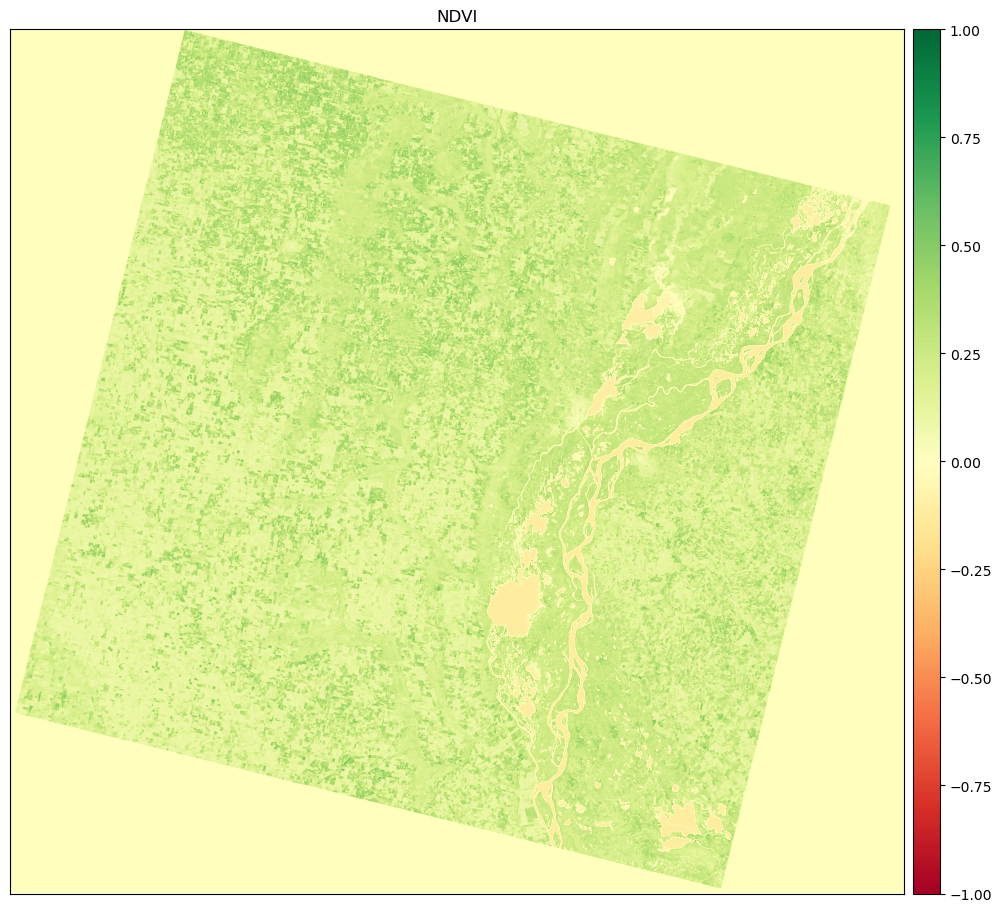

<Axes: title={'center': 'NDVI'}>

In [9]:
import rasterio
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


RUTA_IMAGENES = os.path.abspath("Imagenes/")

b4_file = glob.glob(os.path.join(RUTA_IMAGENES, '*B4*'))[0]
b5_file = glob.glob(os.path.join(RUTA_IMAGENES, '*B5*'))[0]

b4 = rasterio.open(b4_file).read(1)
b5 = rasterio.open(b5_file).read(1)

red = b4.astype('float64')
nir = b5.astype('float64')

ndvi=np.where(
    (nir+red)==0., #It will return 0 for No Data value
    0, 
    (nir-red)/(nir+red))


b4data = rasterio.open(b4_file)
ndviTiff = rasterio.open(f'{RUTA_IMAGENES}ndvi.tiff','w',driver='Gtiff',
                          width = b4data.width, 
                          height = b4data.height, 
                          count=1, crs=b4data.crs, 
                          transform=b4data.transform, 
                          dtype='float64')
ndviTiff.write(ndvi,1)

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title="NDVI", vmin=-1, vmax=1)



In [10]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.25, np.inf]
ndvi_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_class
)
np.unique(ndvi_class)

array([1, 2, 3])

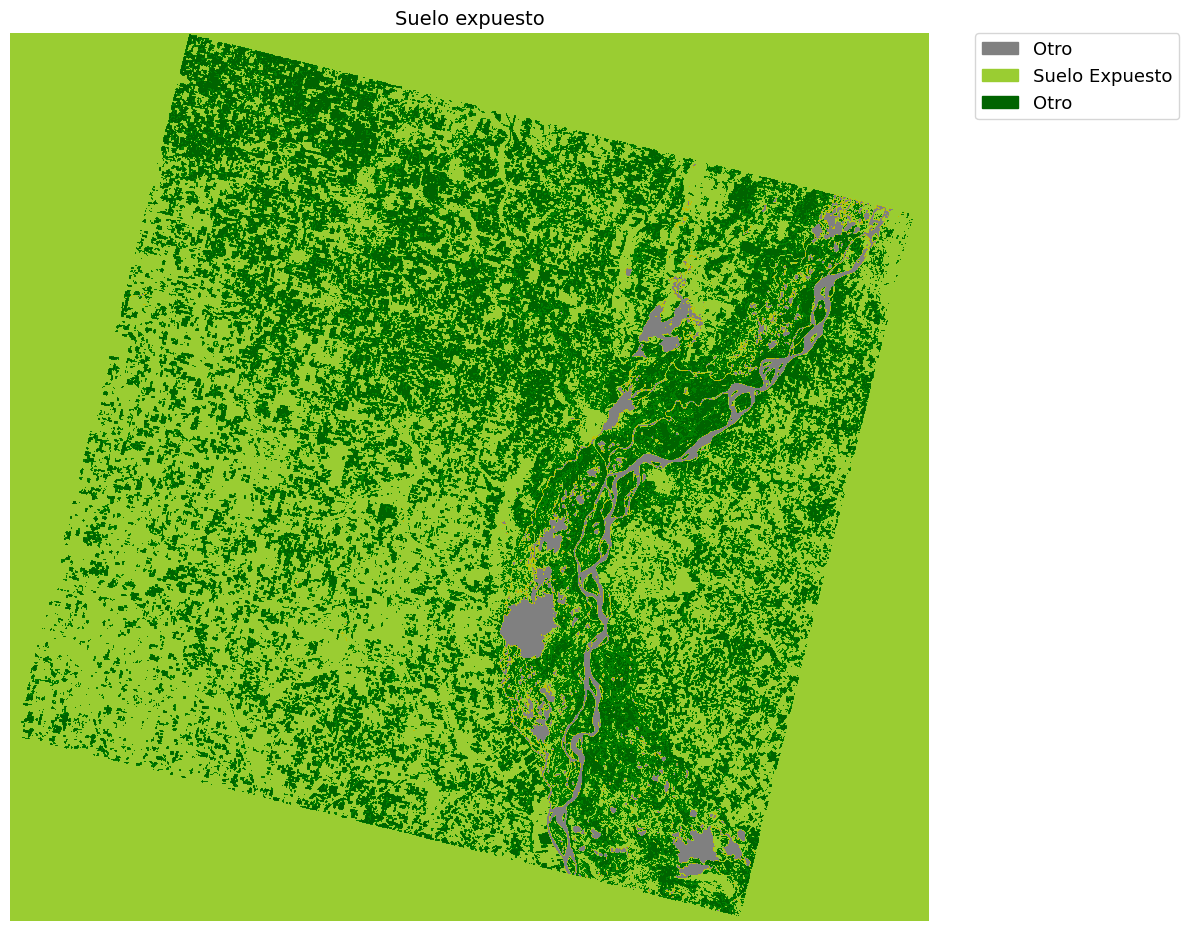

In [11]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Otro",
    "Suelo Expuesto",
    "Otro"
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Suelo expuesto",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()